In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Diabetes_012'] = diabetes['Diabetes_012'].replace({0:0, 1:1, 2:1})

In [3]:
parameters = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Diabetes_012']
key_diabetes = diabetes[parameters]
key_diabetes.head()

,HighBP,HighChol,BMI,GenHlth,DiffWalk,Diabetes_012
0,1.0,1.0,40.0,5.0,1.0,0.0
1,0.0,0.0,25.0,3.0,0.0,0.0
2,1.0,1.0,28.0,5.0,1.0,0.0
3,1.0,0.0,27.0,2.0,0.0,0.0
4,1.0,1.0,24.0,2.0,0.0,0.0


In [4]:
percentile25 = key_diabetes['BMI'].quantile(0.25)
percentile75 = key_diabetes['BMI'].quantile(0.75)
IQR = percentile75 - percentile25
lower_bound = percentile25 - 1.5 * IQR
upper_bound = percentile75 + 1.5 * IQR

key_diabetes = key_diabetes[key_diabetes['BMI'] < upper_bound].copy()

key_diabetes["BMI"].describe()

count    243860.000000
mean         27.567855
std           4.967085
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          41.000000
Name: BMI, dtype: float64

In [5]:
X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
y = key_diabetes['Diabetes_012']
X.describe()

,HighBP,HighChol,BMI,GenHlth,DiffWalk
count,243860.000000,243860.000000,243860.000000,243860.000000,243860.000000
mean,0.420110,0.422013,27.567855,2.481059,0.156959
std,0.493577,0.493882,4.967085,1.059299,0.363763
min,0.000000,0.000000,12.000000,1.000000,0.000000
25%,0.000000,0.000000,24.000000,2.000000,0.000000
50%,0.000000,0.000000,27.000000,2.000000,0.000000
75%,1.000000,1.000000,31.000000,3.000000,0.000000
max,1.000000,1.000000,41.000000,5.000000,1.000000


In [6]:
y.describe()

count    243860.000000
mean          0.148946
std           0.356036
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes_012, dtype: float64

In [7]:
#X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
#y = key_diabetes['Diabetes_012']
#smote = SMOTE()
#X_res, y_res = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)
print(y_train.value_counts())

X_train.shape

Diabetes_012
0.0    165894
1.0    165894
Name: count, dtype: int64


(331788, 5)

Text(0, 0.5, 'Accuracy')

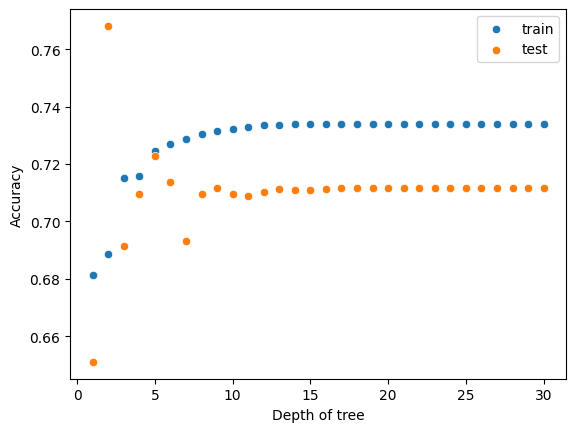

In [8]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [15]:
from sklearn.metrics import confusion_matrix

y_test_pred = T.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
FNR = FN / (FN + TP)
precision = TP / (TP + FP)

print("Confusion Matrix:")
print(cm)
print("True Positive Rate (TPR): " + str(TPR))
print("False Positive Rate (FPR): " + str(FPR))
print("False Negative Rate (FNR): " + str(FNR))
print("Precision: " + str(precision))

Confusion Matrix:
[[  933  6195]
 [  807 40837]]
True Positive Rate (TPR): 0.1308922558922559
False Positive Rate (FPR): 0.019378541926808185
False Negative Rate (FNR): 0.8691077441077442
Precision: 0.5362068965517242


Text(50.7222222222222, 0.5, 'True Label')

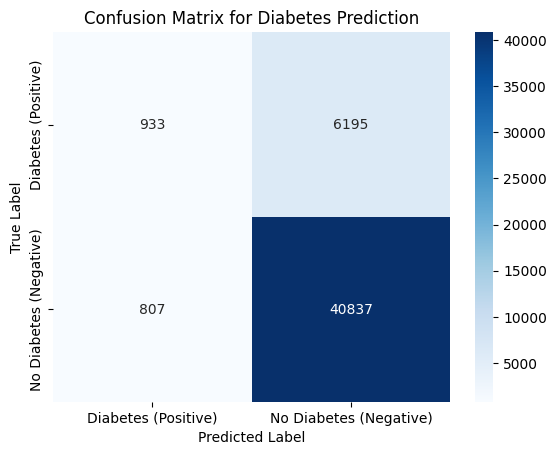

In [16]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

How does model perform without SMOTE balancing?

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
y_train.value_counts()

Diabetes_012
0.0    165894
1.0     29194
Name: count, dtype: int64

Text(0, 0.5, 'Accuracy')

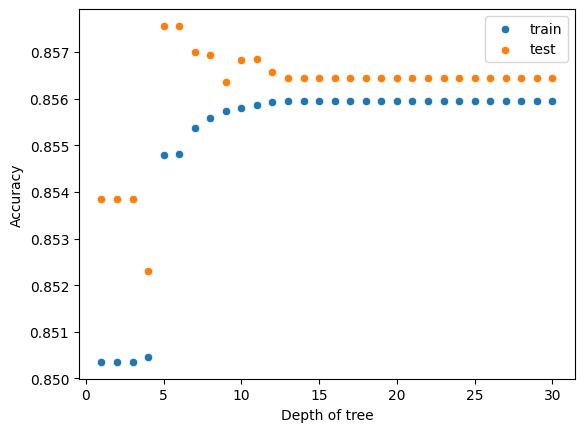

In [18]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [19]:
from sklearn.metrics import confusion_matrix

y_test_pred = T.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
FNR = FN / (FN + TP)
precision = TP / (TP + FP)

print("Confusion Matrix:")
print(cm)
print("True Positive Rate (TPR): " + str(TPR))
print("False Positive Rate (FPR): " + str(FPR))
print("False Negative Rate (FNR): " + str(FNR))
print("Precision: " + str(precision))

Confusion Matrix:
[[  933  6195]
 [  807 40837]]
True Positive Rate (TPR): 0.1308922558922559
False Positive Rate (FPR): 0.019378541926808185
False Negative Rate (FNR): 0.8691077441077442
Precision: 0.5362068965517242


Text(50.7222222222222, 0.5, 'True Label')

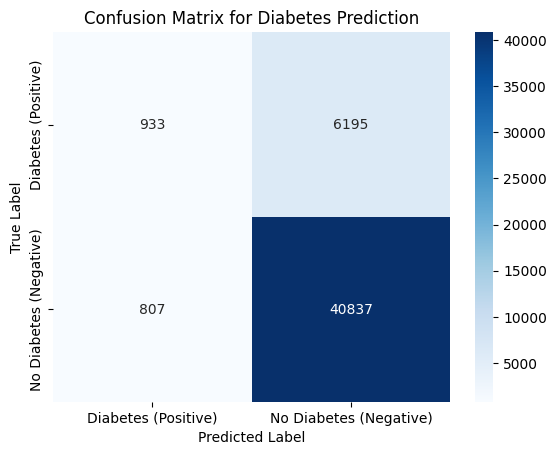

In [20]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

High rate of false negative shows that the model without accounting for the abnormally high percentage of non-diabetic patients using SMOTE has a baseline of defaulting to predict to the majority in the target variable which in this case is that a patient doesn't have diabetes. Since the model that doesn't use SMOTE defaults to this "thinking" pattern we see a high rate of false negatives which isn't good for our test case since predicting that a person doesn't have diabetes when they do can be detrimental to their health. 